In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [7]:
train = pd.read_csv(r"/kaggle/input/diabetes-dataset/train.csv")
test  = pd.read_csv(r"/kaggle/input/diabetes-dataset/test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (700000, 26)
Test shape: (300000, 25)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [9]:
# Missing values
train.isnull().sum().sort_values(ascending=False).head(10)

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
dtype: int64

In [10]:
# Duplicates
train.duplicated().sum()

0

In [18]:
target = "diagnosed_diabetes"

train[target].value_counts(normalize=True) * 100


diagnosed_diabetes
1.0    62.329571
0.0    37.670429
Name: proportion, dtype: float64

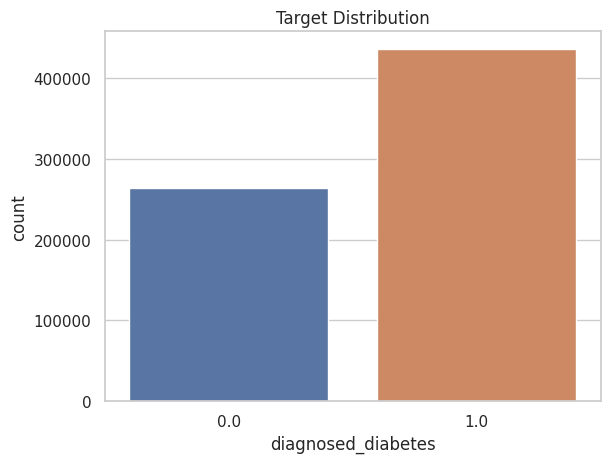

In [19]:
sns.countplot(x=target, data=train)
plt.title("Target Distribution")
plt.show()

In [15]:
num_features = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'bmi',
    'waist_to_hip_ratio',
    'systolic_bp',
    'diastolic_bp',
    'heart_rate',
    'cholesterol_total',
    'hdl_cholesterol',
    'ldl_cholesterol',
    'triglycerides'
]
train[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,700000.0,50.359734,11.655520,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.0,2.072411,1.048189,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.0,80.230803,51.195071,1.00,49.00,71.00,96.00,747.00
diet_score,700000.0,5.963695,1.463336,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.0,7.002200,0.901907,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.0,6.012733,2.022707,0.60,4.60,6.00,7.40,16.50
bmi,700000.0,25.874684,2.860705,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.0,0.858766,0.037980,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,116.294193,11.010390,91.00,108.00,116.00,124.00,163.00
diastolic_bp,700000.0,75.440924,6.825775,51.00,71.00,75.00,80.00,104.00


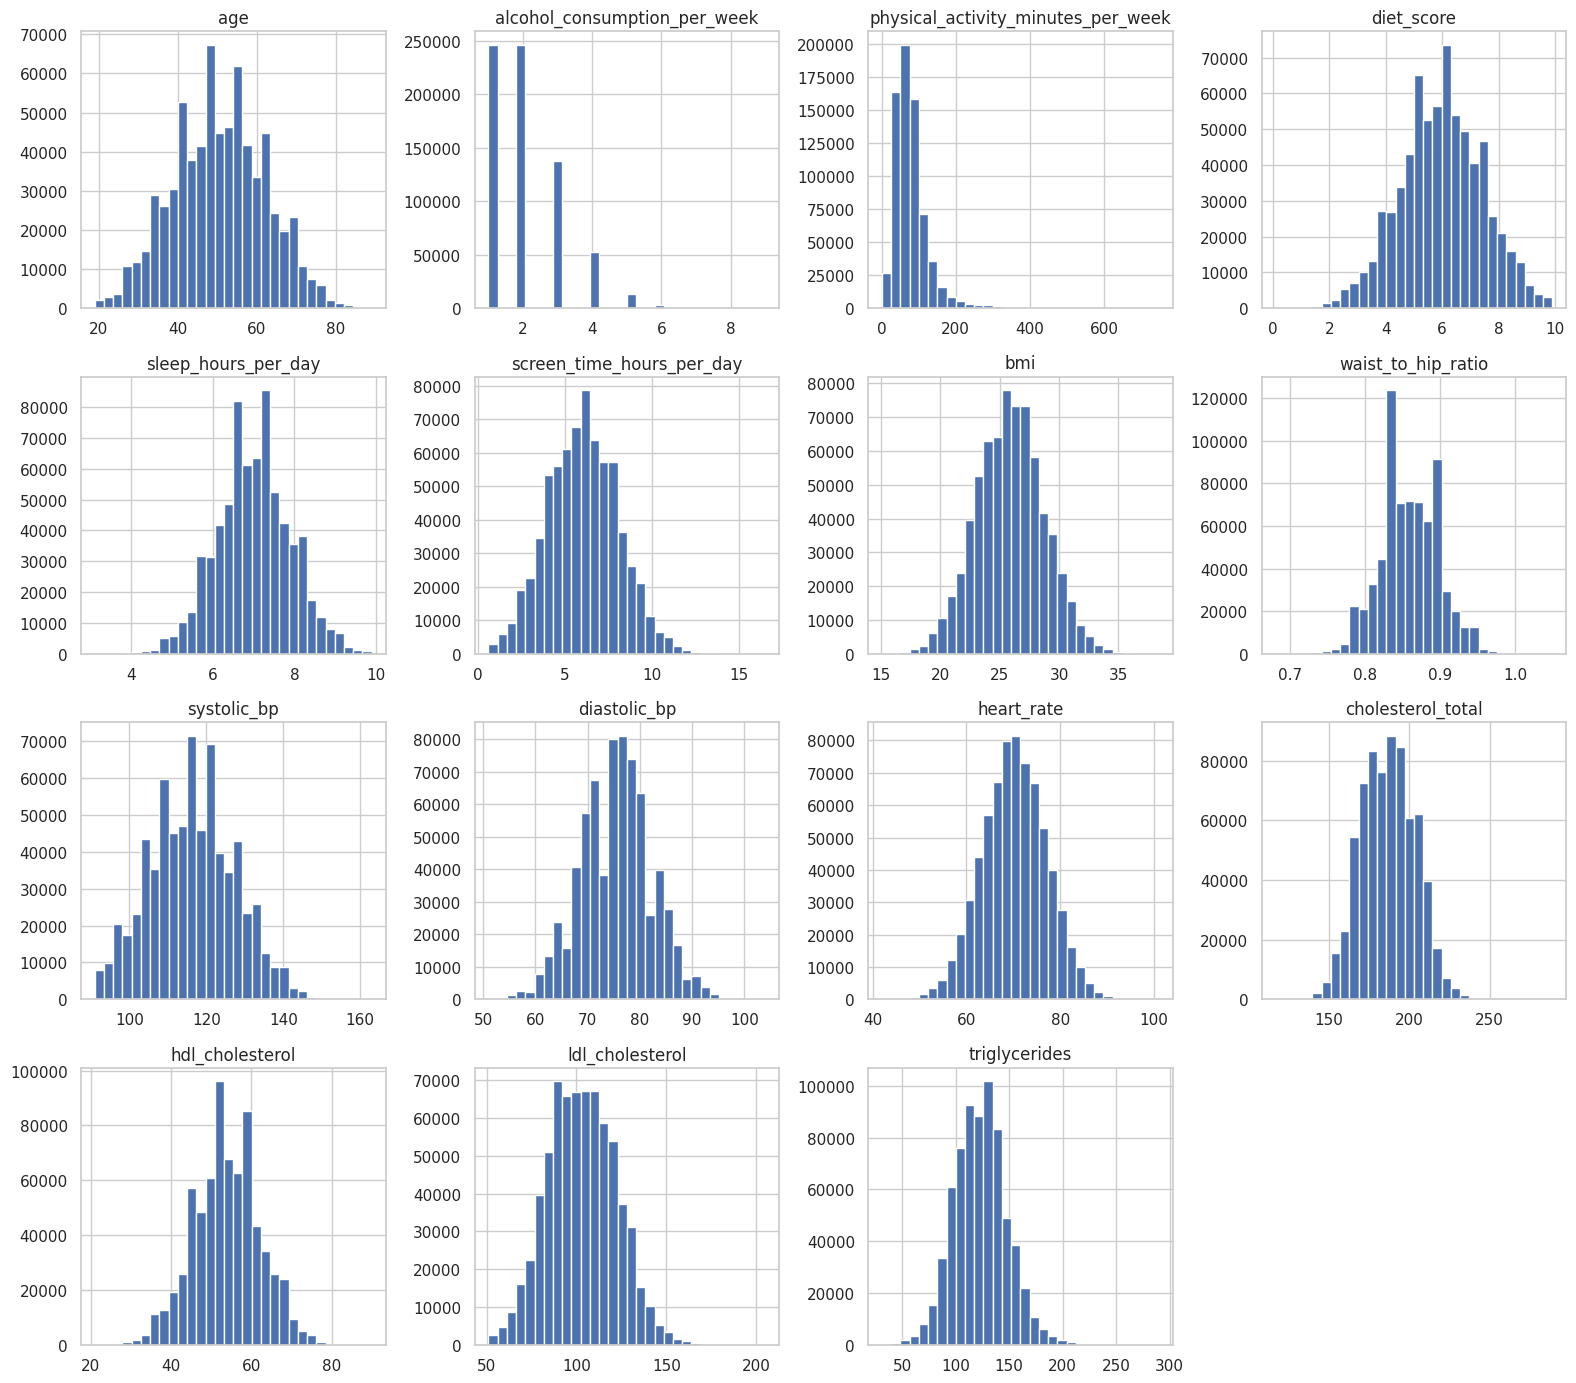

In [20]:
train[num_features].hist(figsize=(16, 14), bins=30)
plt.tight_layout()
plt.show()


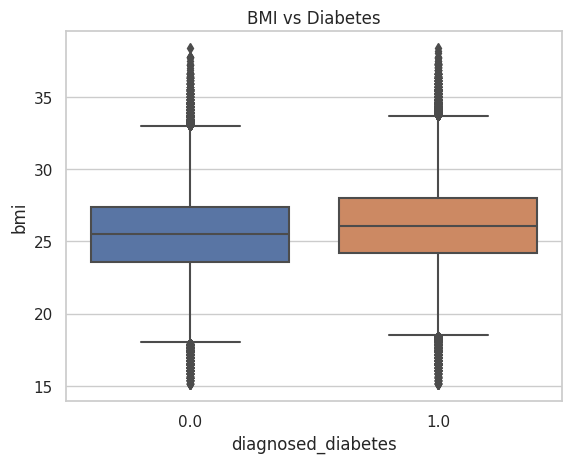

In [21]:
sns.boxplot(x=target, y='bmi', data=train)
plt.title("BMI vs Diabetes")
plt.show()

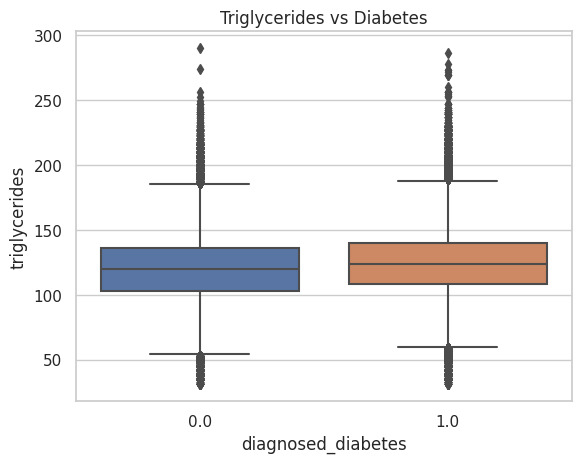

In [22]:
sns.boxplot(x=target, y='triglycerides', data=train)
plt.title("Triglycerides vs Diabetes")
plt.show()

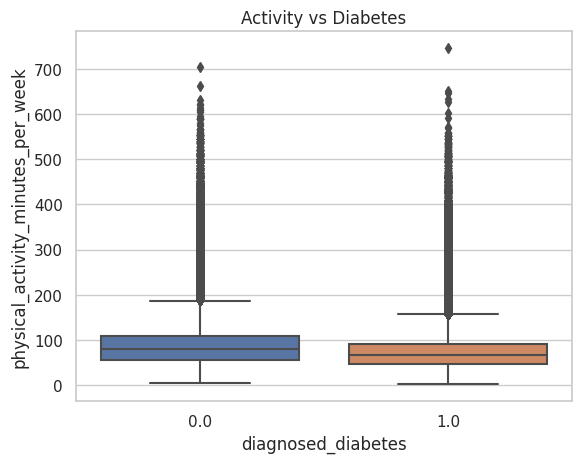

In [23]:
sns.boxplot(x=target, y='physical_activity_minutes_per_week', data=train)
plt.title("Activity vs Diabetes")
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


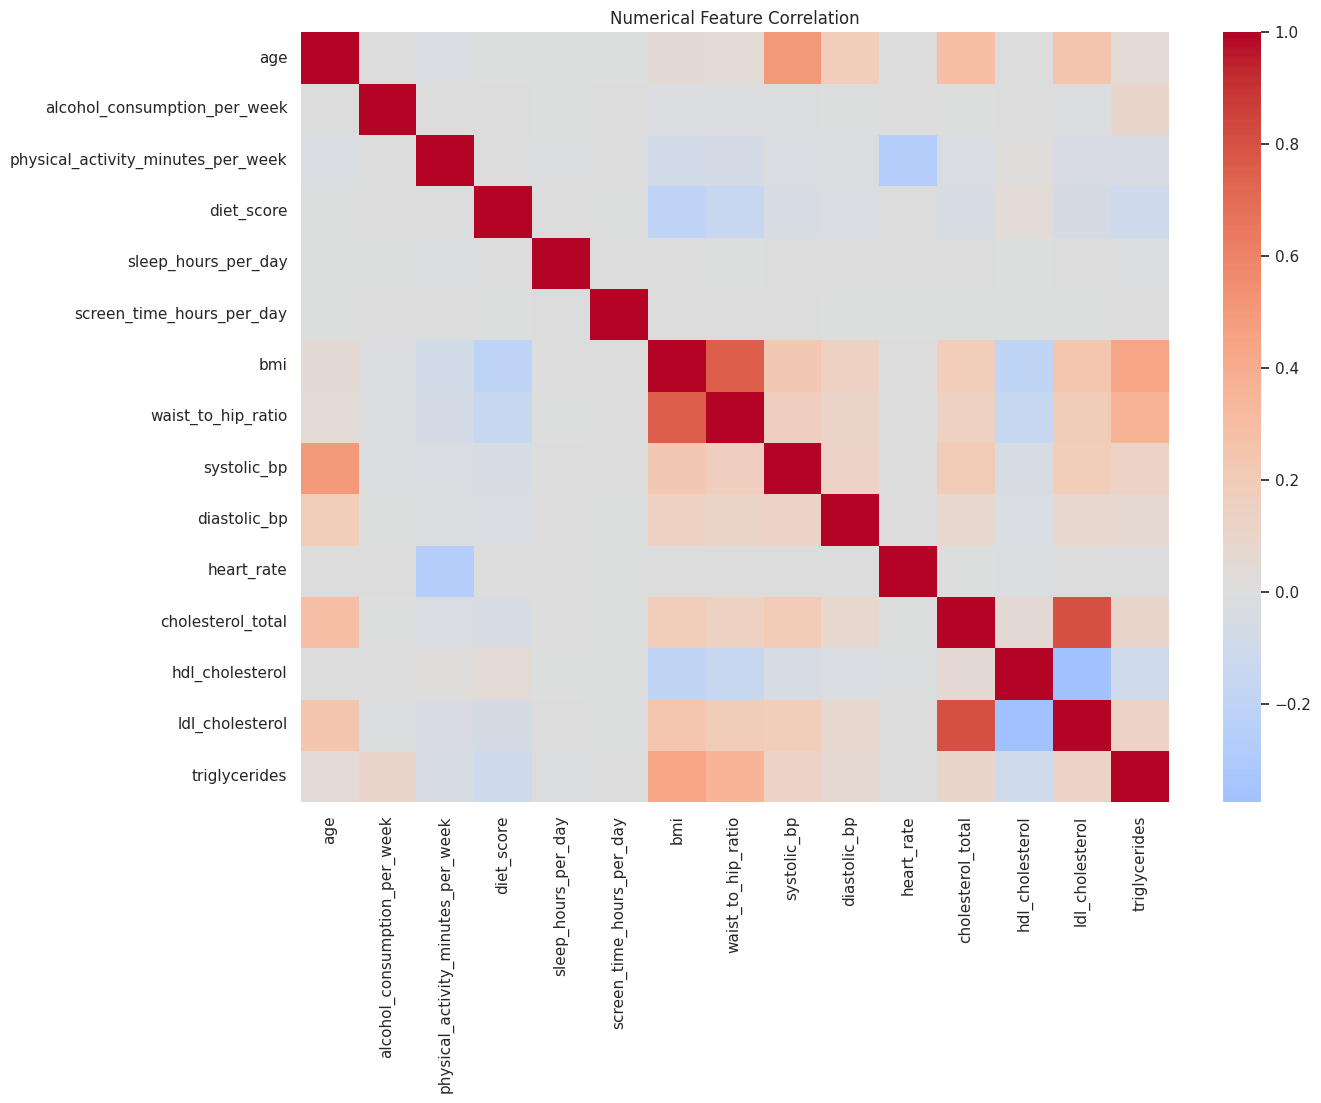

In [24]:
plt.figure(figsize=(14, 10))
sns.heatmap(train[num_features].corr(), cmap="coolwarm", center=0)
plt.title("Numerical Feature Correlation")
plt.show()

In [25]:
binary_flags = [
    'family_history_diabetes',
    'hypertension_history',
    'cardiovascular_history'
]

for col in binary_flags:
    display(
        train.groupby(col)[target].mean().rename("Diabetes Rate")
    )


family_history_diabetes
0    0.580433
1    0.867328
Name: Diabetes Rate, dtype: float64

hypertension_history
0    0.616444
1    0.654094
Name: Diabetes Rate, dtype: float64

cardiovascular_history
0    0.621175
1    0.691101
Name: Diabetes Rate, dtype: float64

In [26]:
ordinal_features = ['education_level', 'income_level']

for col in ordinal_features:
    print(f"\n{col}")
    display(
        train.groupby(col)[target].mean().sort_values()
    )



education_level


education_level
Postgraduate    0.616647
Highschool      0.621462
Graduate        0.627008
No formal       0.636066
Name: diagnosed_diabetes, dtype: float64


income_level


income_level
Middle          0.620291
Upper-Middle    0.620420
High            0.623593
Lower-Middle    0.626835
Low             0.630328
Name: diagnosed_diabetes, dtype: float64

In [27]:
nominal_features = [
    'gender',
    'ethnicity',
    'smoking_status',
    'employment_status'
]

for col in nominal_features:
    print(f"\n{col}")
    display(
        train[col].value_counts(normalize=True).head(10)
    )



gender


gender
Female    0.518910
Male      0.475836
Other     0.005254
Name: proportion, dtype: float64


ethnicity


ethnicity
White       0.551647
Hispanic    0.185691
Black       0.151859
Asian       0.085886
Other       0.024917
Name: proportion, dtype: float64


smoking_status


smoking_status
Never      0.706354
Current    0.147661
Former     0.145984
Name: proportion, dtype: float64


employment_status


employment_status
Employed      0.737386
Retired       0.165336
Unemployed    0.071124
Student       0.026154
Name: proportion, dtype: float64

In [28]:
for col in nominal_features:
    print(f"\nDiabetes rate by {col}")
    display(
        train.groupby(col)[target].mean().sort_values(ascending=False)
    )



Diabetes rate by gender


gender
Other     0.640566
Male      0.624294
Female    0.622205
Name: diagnosed_diabetes, dtype: float64


Diabetes rate by ethnicity


ethnicity
Other       0.635936
Asian       0.628493
White       0.624105
Black       0.623879
Hispanic    0.616314
Name: diagnosed_diabetes, dtype: float64


Diabetes rate by smoking_status


smoking_status
Former     0.625331
Current    0.623124
Never      0.622911
Name: diagnosed_diabetes, dtype: float64


Diabetes rate by employment_status


employment_status
Employed      0.624643
Unemployed    0.622130
Student       0.621586
Retired       0.618058
Name: diagnosed_diabetes, dtype: float64

In [29]:
train[['id']].head()


,id
0,0
1,1
2,2
3,3
4,4


In [30]:
TARGET = "diagnosed_diabetes"

X = train.drop(columns=[TARGET, "id"])
y = train[TARGET]

X_test = test.drop(columns=["id"])

In [31]:
NUMERIC_FEATURES = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'bmi',
    'waist_to_hip_ratio',
    'systolic_bp',
    'diastolic_bp',
    'heart_rate',
    'cholesterol_total',
    'hdl_cholesterol',
    'ldl_cholesterol',
    'triglycerides'
]

BINARY_FEATURES = [
    'family_history_diabetes',
    'hypertension_history',
    'cardiovascular_history'
]

ORDINAL_FEATURES = {
    'education_level': [
        'Highschool', 'Bachelor', 'Master', 'PhD'
    ],
    'income_level': [
        'Low', 'Lower-Middle', 'Upper-Middle', 'High'
    ]
}

NOMINAL_FEATURES = [
    'gender',
    'ethnicity',
    'smoking_status',
    'employment_status'
]


In [32]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(
    categories=[ORDINAL_FEATURES[col] for col in ORDINAL_FEATURES],
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

X[list(ORDINAL_FEATURES.keys())] = ordinal_encoder.fit_transform(
    X[list(ORDINAL_FEATURES.keys())]
)

X_test[list(ORDINAL_FEATURES.keys())] = ordinal_encoder.transform(
    X_test[list(ORDINAL_FEATURES.keys())]
)


In [33]:
for col in NOMINAL_FEATURES:
    X[col] = X[col].astype("category")
    X_test[col] = X_test[col].astype("category")

In [34]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 700000 non-null  int64   
 1   alcohol_consumption_per_week        700000 non-null  int64   
 2   physical_activity_minutes_per_week  700000 non-null  int64   
 3   diet_score                          700000 non-null  float64 
 4   sleep_hours_per_day                 700000 non-null  float64 
 5   screen_time_hours_per_day           700000 non-null  float64 
 6   bmi                                 700000 non-null  float64 
 7   waist_to_hip_ratio                  700000 non-null  float64 
 8   systolic_bp                         700000 non-null  int64   
 9   diastolic_bp                        700000 non-null  int64   
 10  heart_rate                          700000 non-null  int64   
 11  cholesterol_t

In [35]:
X.assign(target=y).groupby("smoking_status")["target"].mean().sort_values()

/tmp/ipykernel_47/3520854460.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  X.assign(target=y).groupby("smoking_status")["target"].mean().sort_values()


smoking_status
Never      0.622911
Current    0.623124
Former     0.625331
Name: target, dtype: float64

In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

In [37]:
N_SPLITS = 5

skf = StratifiedKFold(
    n_splits=N_SPLITS,
    shuffle=True,
    random_state=42
)

In [38]:
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    print(
        f"Fold {fold} | "
        f"Train positive: {y_train.mean():.4f} | "
        f"Val positive: {y_val.mean():.4f}"
    )


Fold 0 | Train positive: 0.6233 | Val positive: 0.6233
Fold 1 | Train positive: 0.6233 | Val positive: 0.6233
Fold 2 | Train positive: 0.6233 | Val positive: 0.6233
Fold 3 | Train positive: 0.6233 | Val positive: 0.6233
Fold 4 | Train positive: 0.6233 | Val positive: 0.6233


In [39]:
oof_preds = np.zeros(len(X))
test_preds = np.zeros(len(X_test))

fold_scores = []


In [46]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import numpy as np
from lightgbm import early_stopping, log_evaluation


In [47]:
lgb_params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    
    # GPU
    "device": "gpu",
    "gpu_platform_id": 0,
    "gpu_device_id": 0,
    
    # Core learning params
    "learning_rate": 0.05,
    "num_leaves": 64,
    "max_depth": -1,
    "min_data_in_leaf": 100,
    
    # Regularization (important for synthetic data)
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 1,
    
    "lambda_l1": 0.1,
    "lambda_l2": 0.1,
    
    # Stability
    "verbosity": -1,
    "seed": 42
}


In [48]:
categorical_features = [
    'gender',
    'ethnicity',
    'smoking_status',
    'employment_status'
]


In [49]:
oof_preds = np.zeros(len(X))
test_preds = np.zeros(len(X_test))
fold_scores = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n🚀 Fold {fold+1}/{N_SPLITS}")
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    train_data = lgb.Dataset(
        X_train,
        label=y_train,
        categorical_feature=categorical_features,
        free_raw_data=False
    )
    
    val_data = lgb.Dataset(
        X_val,
        label=y_val,
        categorical_feature=categorical_features,
        free_raw_data=False
    )
    
    model = lgb.train(
        params=lgb_params,
        train_set=train_data,
        num_boost_round=5000,
        valid_sets=[train_data, val_data],
        valid_names=["train", "valid"],
        callbacks=[
            early_stopping(stopping_rounds=200),
            log_evaluation(period=200)
        ]
    )
    
    val_preds = model.predict(
        X_val, num_iteration=model.best_iteration
    )
    oof_preds[val_idx] = val_preds
    
    fold_auc = roc_auc_score(y_val, val_preds)
    fold_scores.append(fold_auc)
    
    print(f"✅ Fold AUC: {fold_auc:.6f}")
    
    test_preds += model.predict(
        X_test, num_iteration=model.best_iteration
    ) / N_SPLITS



🚀 Fold 1/5


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


Training until validation scores don't improve for 200 rounds
[200]	train's auc: 0.735075	valid's auc: 0.725872
[400]	train's auc: 0.746837	valid's auc: 0.727267
[600]	train's auc: 0.757077	valid's auc: 0.727521
[800]	train's auc: 0.766474	valid's auc: 0.727414
Early stopping, best iteration is:
[609]	train's auc: 0.757527	valid's auc: 0.727544
✅ Fold AUC: 0.727544

🚀 Fold 2/5
Training until validation scores don't improve for 200 rounds
[200]	train's auc: 0.735164	valid's auc: 0.72359
[400]	train's auc: 0.747072	valid's auc: 0.725469
[600]	train's auc: 0.75718	valid's auc: 0.725968
[800]	train's auc: 0.766423	valid's auc: 0.726031
[1000]	train's auc: 0.775277	valid's auc: 0.726049
Early stopping, best iteration is:
[919]	train's auc: 0.771717	valid's auc: 0.726157
✅ Fold AUC: 0.726157

🚀 Fold 3/5
Training until validation scores don't improve for 200 rounds
[200]	train's auc: 0.735203	valid's auc: 0.724997
[400]	train's auc: 0.746907	valid's auc: 0.726575
[600]	train's auc: 0.756985	v

In [50]:
print("\n📊 CV RESULTS")
print(f"Mean AUC: {np.mean(fold_scores):.6f}")
print(f"Std  AUC: {np.std(fold_scores):.6f}")


📊 CV RESULTS
Mean AUC: 0.727450
Std  AUC: 0.000692


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

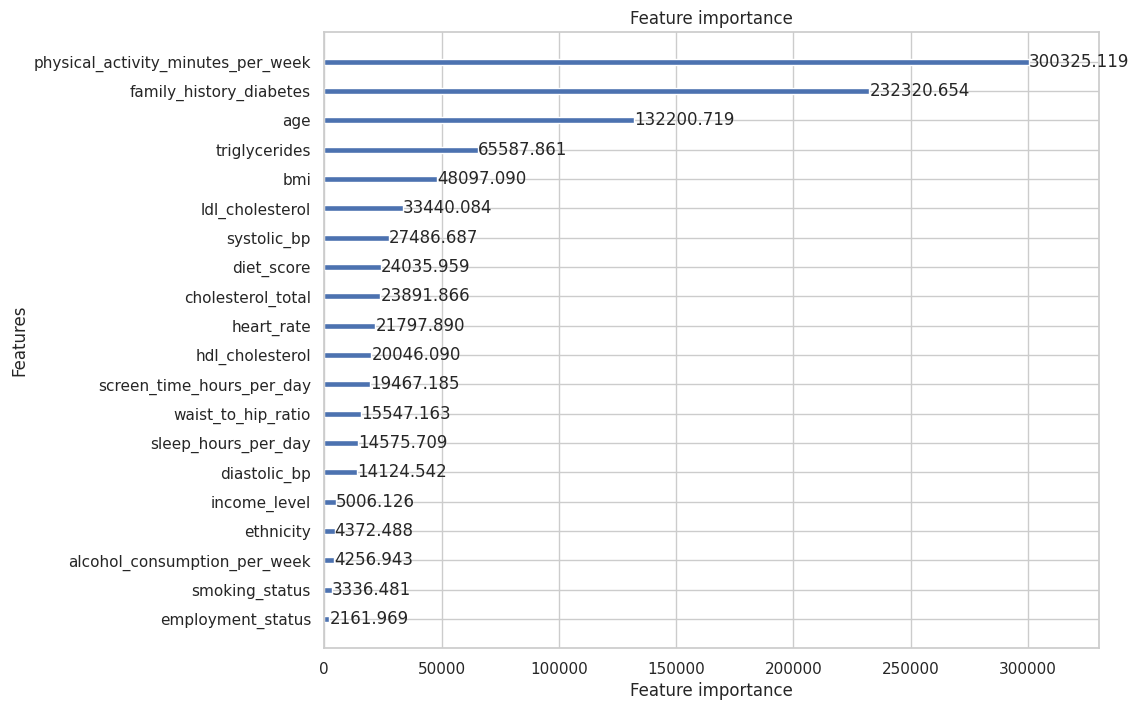

In [51]:
lgb.plot_importance(
    model, 
    max_num_features=20, 
    importance_type="gain",
    figsize=(10, 8)
)

In [52]:
submission = pd.DataFrame({
    "id": test["id"],
    "diagnosed_diabetes": test_preds
})

submission.to_csv("submission.csv", index=False)
submission.head()


,id,diagnosed_diabetes
0,700000,0.506974
1,700001,0.684474
2,700002,0.770731
3,700003,0.366581
4,700004,0.928886


In [53]:
from sklearn.metrics import classification_report

threshold = 0.35 
y_pred = (oof_preds > threshold).astype(int)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.15      0.25    263693
         1.0       0.65      0.97      0.78    436307

    accuracy                           0.66    700000
   macro avg       0.69      0.56      0.52    700000
weighted avg       0.68      0.66      0.58    700000

